In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [2]:
import os
import pandas as pd

train_dir = r"C:\Users\DEVADHARSHINI K\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
test_dir = r"C:\Users\DEVADHARSHINI K\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Test"

# Create dataframes
train_df = pd.DataFrame(columns=['image_path', 'label'])
test_df = pd.DataFrame(columns=['image_path', 'label'])

# Add images paths and labels to dataframes
for label, directory in enumerate(os.listdir(train_dir)):
    for filename in os.listdir(os.path.join(train_dir, directory)):
        image_path = os.path.join(train_dir, directory, filename)
        train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)

for label, directory in enumerate(os.listdir(test_dir)):
    for filename in os.listdir(os.path.join(test_dir, directory)):
        image_path = os.path.join(test_dir, directory, filename)
        test_df = test_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
        
# Combine train_df and test_df into one dataframe
df = pd.concat([train_df, test_df], ignore_index=True)
del test_df,train_df
df

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\1288504456.py:15: FutureWarning

image_path label
0     C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0
1     C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0
2     C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0
3     C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0
4     C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0
...                                                 ...   ...
2352  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     7
2353  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     7
2354  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     8
2355  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     8
2356  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     8

[2357 rows x 2 columns]

In [3]:
# Get list of directories in train_dir
labels = os.listdir(train_dir)

# Create label_map dictionary
label_map = {i: label for i, label in enumerate(labels)}
num_classes=len(label_map)
label_map

{0: 'actinic keratosis',
 1: 'basal cell carcinoma',
 2: 'dermatofibroma',
 3: 'melanoma',
 4: 'nevus',
 5: 'pigmented benign keratosis',
 6: 'seborrheic keratosis',
 7: 'squamous cell carcinoma',
 8: 'vascular lesion'}

In [4]:
max_images_per_class = 2500

# Group by label column and take first max_images_per_class rows for each group
df = df.groupby("label").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_62852\3886418994.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby("label").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)


In [5]:
import tensorflow as tf

# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [6]:
import multiprocessing

# Get the number of CPU cores available
max_workers = multiprocessing.cpu_count()
max_workers

8

In [7]:
import concurrent.futures

# Define a function to resize image arrays
def resize_image_array(image_path):
    return np.asarray(Image.open(image_path).resize((100,75)))

# Use concurrent.futures to parallelize the resizing process
with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Use executor.map to apply the function to each image path in the DataFrame
    image_arrays = list(executor.map(resize_image_array, df['image_path'].tolist()))

# Add the resized image arrays to the DataFrame
df['image'] = image_arrays
del image_arrays

In [8]:
df.head()

image_path label  \
0  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0   
1  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0   
2  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0   
3  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0   
4  C:\Users\DEVADHARSHINI K\Downloads\archive (1)...     0   

                                               image  
0  [[[139, 79, 87], [138, 77, 84], [128, 63, 65],...  
1  [[[114, 85, 85], [96, 66, 60], [86, 64, 69], [...  
2  [[[166, 120, 116], [170, 126, 122], [175, 132,...  
3  [[[168, 91, 91], [179, 103, 102], [185, 112, 1...  
4  [[[206, 155, 156], [206, 156, 157], [211, 164,...

In [9]:
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               actinic keratosis              130       
1               basal cell carcinoma           392       
2               dermatofibroma                 111       
3               melanoma                       454       
4               nevus                          373       
5               pigmented benign keratosis     478       
6               seborrheic keratosis           80        
7               squamous cell carcinoma        197       
8               vascular lesion                142       
------------------------------------------------------------
Total                                         2357      


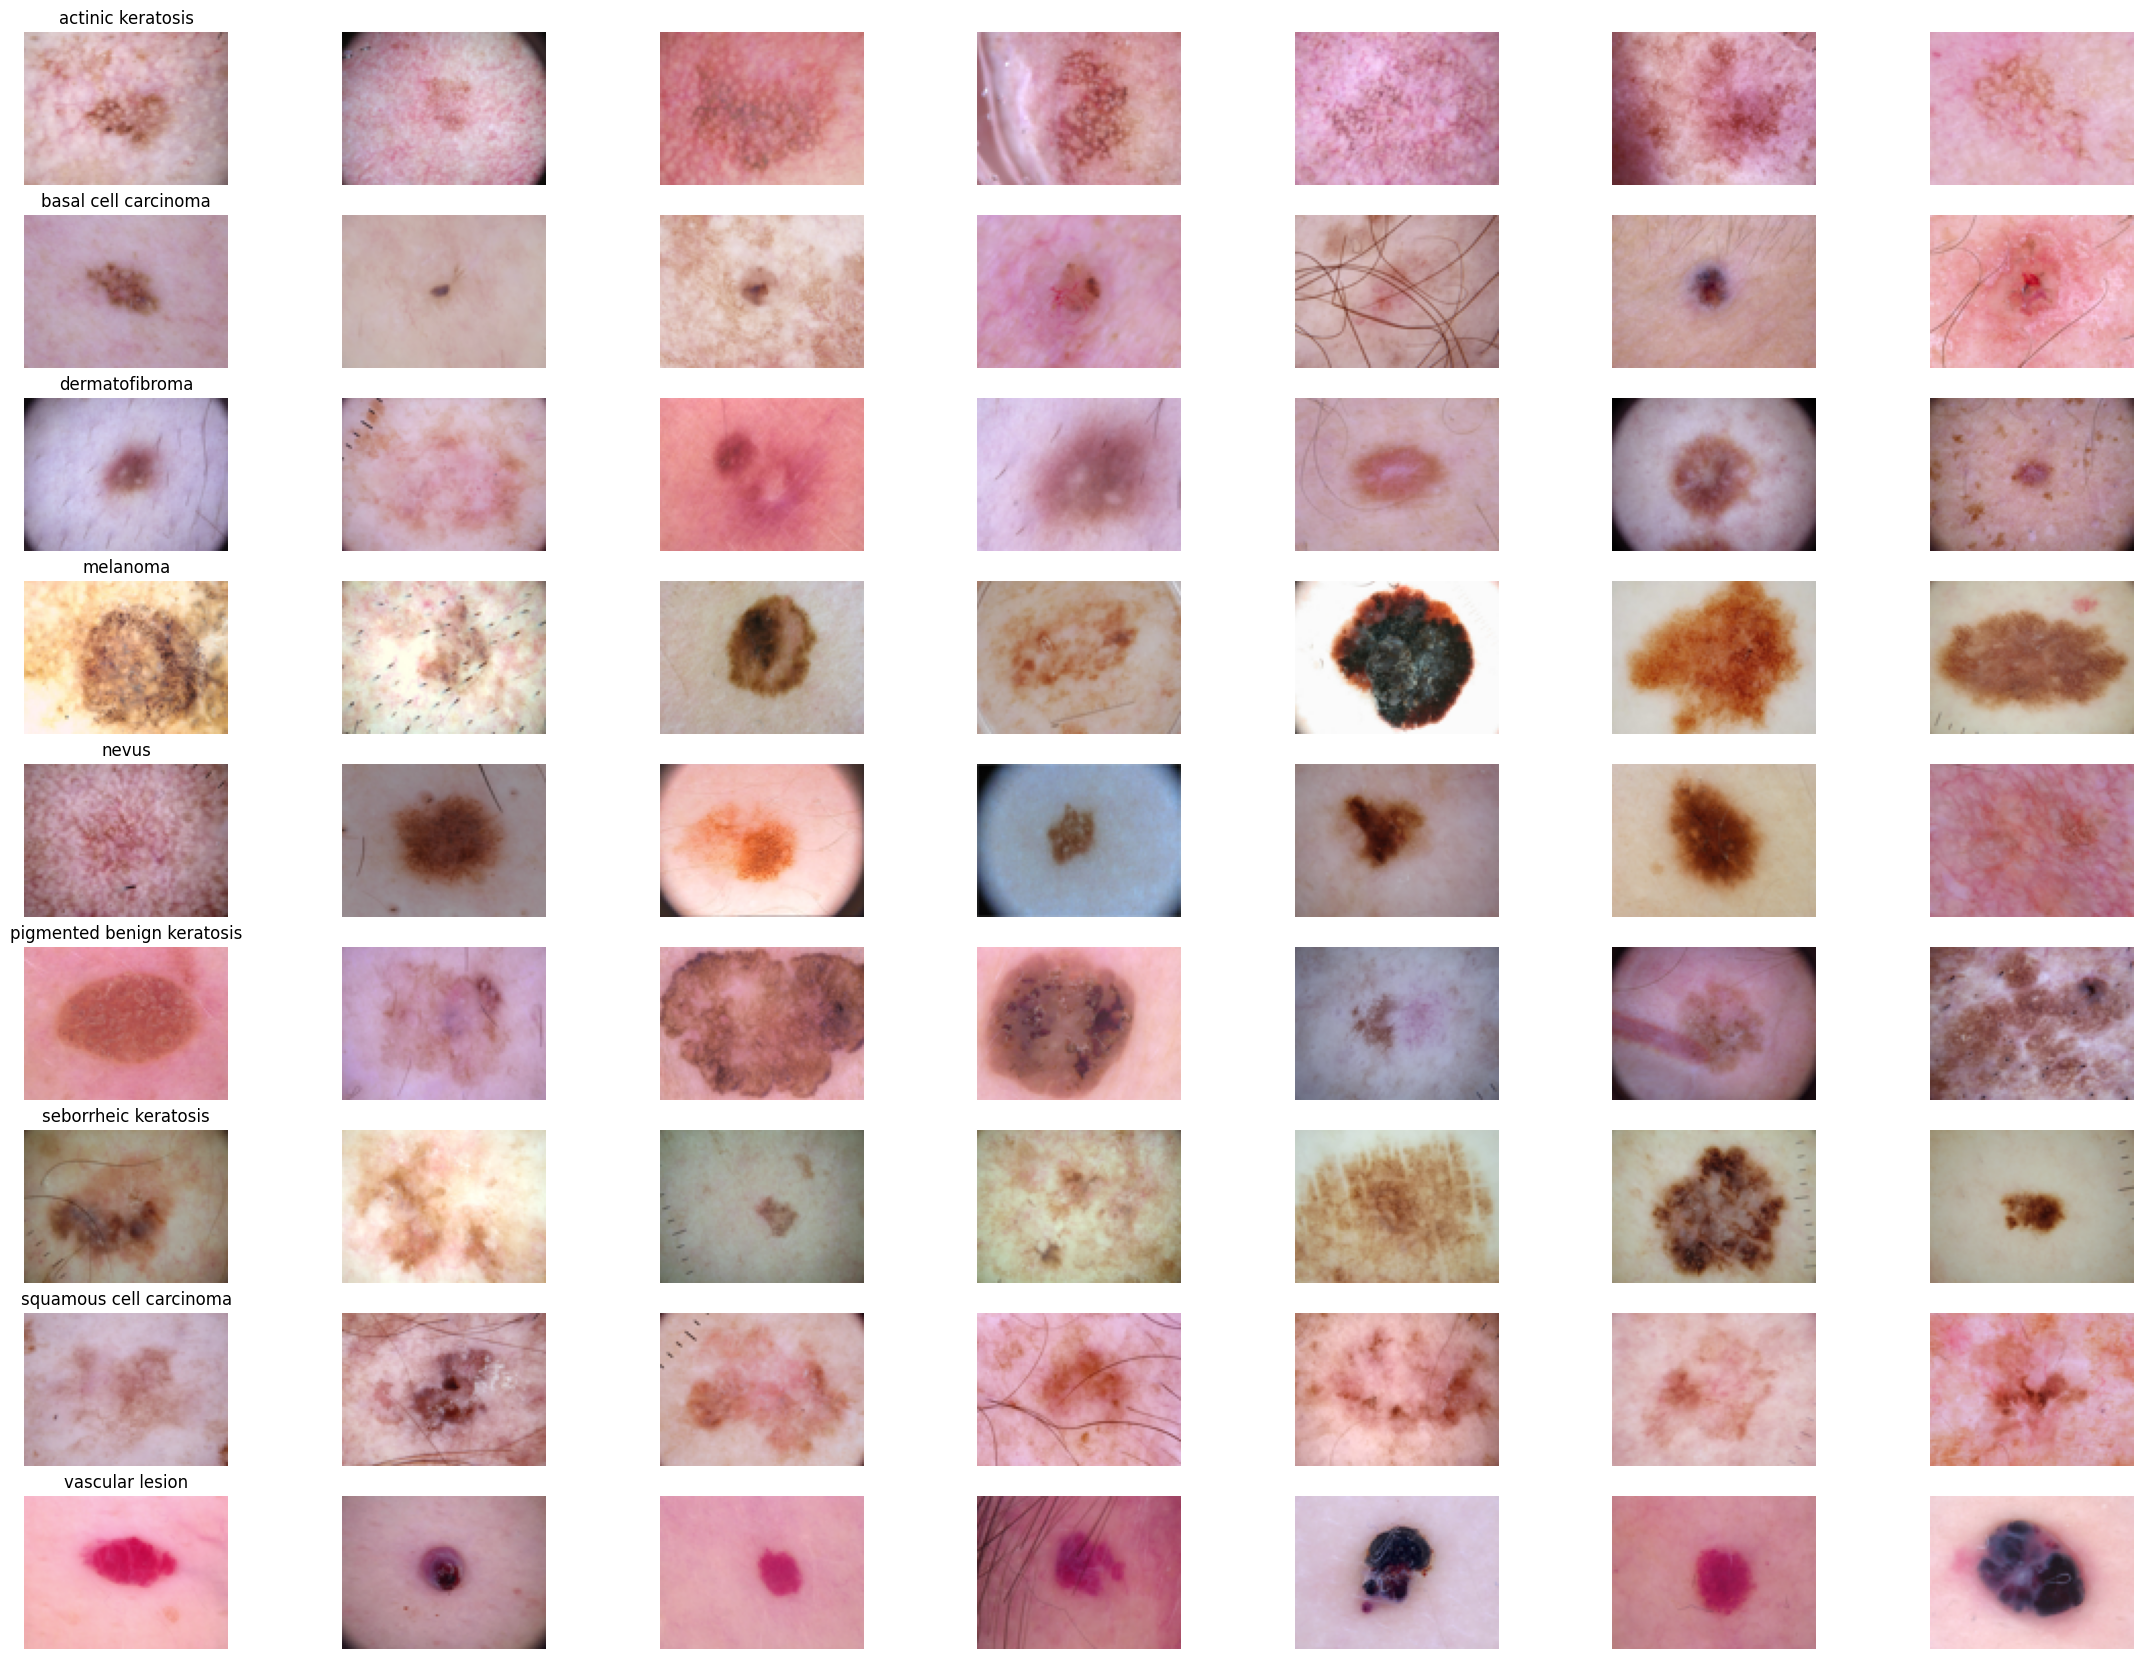

In [10]:
n_samples = 7
fig, m_axs = plt.subplots(num_classes, n_samples, figsize=(4*n_samples, 3*7))
for n_axs, (class_idx, class_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    class_name = label_map[class_idx] # get the class name using label_map
    n_axs[0].set_title(class_name)
    for c_ax, (_, c_row) in zip(n_axs, class_rows.sample(n_samples, random_state=5).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


In [11]:
df['image'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    2357
Name: image, dtype: int64

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with the desired transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               actinic keratosis              130       
1               basal cell carcinoma           392       
2               dermatofibroma                 111       
3               melanoma                       454       
4               nevus                          373       
5               pigmented benign keratosis     478       
6               seborrheic keratosis           80        
7               squamous cell carcinoma        197       
8               vascular lesion                142       
------------------------------------------------------------
Total                                         2357      


In [14]:
features = df.drop(columns=['label','image_path'],axis=1)
target = df['label']
print(target.shape,features.shape)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20,shuffle=True)

(2357,) (2357, 1)


In [15]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [16]:
y_train = to_categorical(y_train,num_classes = num_classes)
y_test = to_categorical(y_test,num_classes = num_classes)

In [17]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.20,shuffle=True)
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))
y_train = y_train.astype(int)
y_validate = y_validate.astype(int)

In [18]:
train_counts = np.sum(y_train, axis=0)
val_counts = np.sum(y_validate, axis=0)
test_counts = np.sum(y_test, axis=0)

# Print the number of images in each class for train, validation, and test datasets
print("Dataset Summary")
print("-" * 90)
print(f"{'Class Label':<15} {'Class Name':<30} {'Train':<10} {'Validation':<12} {'Test':<10} {'Total':<10}")
print("-" * 90)
for class_label, class_name in label_map.items():
    train_num = int(train_counts[class_label])
    val_num = int(val_counts[class_label])
    test_num = int(test_counts[class_label])
    total_num = train_num + val_num + test_num
    print(f"{class_label:<15} {class_name:<30} {train_num:<10} {val_num:<12} {test_num:<10} {total_num:<10}")
print("-" * 90)
print(f"{'Total':<46} {len(y_train):<10} {len(y_validate):<12} {len(y_test):<10} {len(y_train) + len(y_validate) + len(y_test):<10}")

Dataset Summary
------------------------------------------------------------------------------------------
Class Label     Class Name                     Train      Validation   Test       Total     
------------------------------------------------------------------------------------------
0               actinic keratosis              97         17           16         130       
1               basal cell carcinoma           259        50           83         392       
2               dermatofibroma                 74         13           24         111       
3               melanoma                       295        74           85         454       
4               nevus                          252        54           67         373       
5               pigmented benign keratosis     280        95           103        478       
6               seborrheic keratosis           49         11           20         80        
7               squamous cell carcinoma        118        

In [19]:
df.groupby('label').size()

label
0    130
1    392
2    111
3    454
4    373
5    478
6     80
7    197
8    142
dtype: int64

In [20]:
input_shape = df['image'][0].shape

In [21]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [22]:
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from datetime import datetime

In [23]:
model_DenseNet201 = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
model1 = Sequential()
for layer in model_DenseNet201.layers:
        layer.trainable = False
model1.add(model_DenseNet201)
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 3, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dropout (Dropout)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 512)               5898752   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [24]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

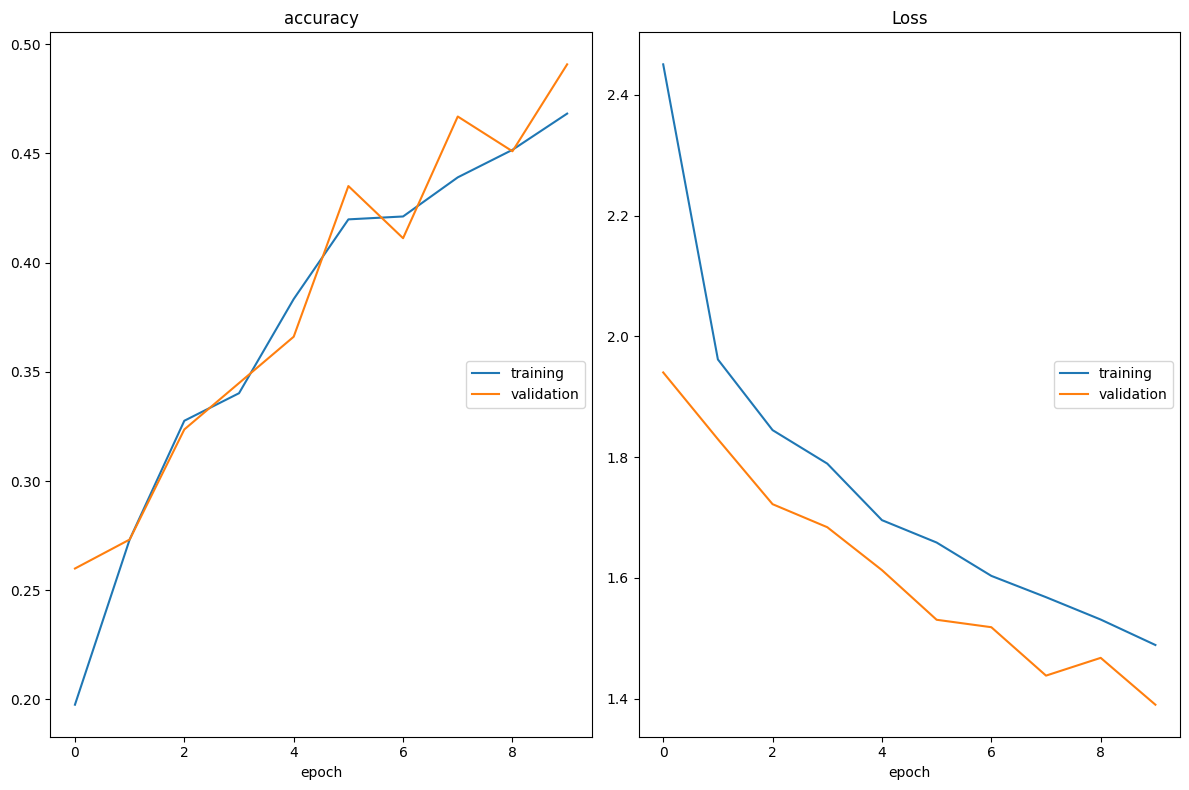

accuracy
	training         	 (min:    0.198, max:    0.468, cur:    0.468)
	validation       	 (min:    0.260, max:    0.491, cur:    0.491)
Loss
	training         	 (min:    1.489, max:    2.450, cur:    1.489)
	validation       	 (min:    1.390, max:    1.940, cur:    1.390)
48/48 [==============================] - 64s 1s/step - loss: 1.4888 - accuracy: 0.4682 - val_loss: 1.3899 - val_accuracy: 0.4907


In [25]:
# Fit the model
# start = datetime.now()
history = model1.fit(x=x_train,
                    y=y_train,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=32,
                    validation_data=(x_validate,y_validate),
                    callbacks=[PlotLossesKeras()]
                   )
# stop = datetime.now() - start
# print("Training Time: ",stop)

In [26]:
loss, accuracy = model1.evaluate(x_train, y_train, verbose=1)
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

48/48 [==============================] - 48s 990ms/step - loss: 1.3097 - accuracy: 0.5597
Train: accuracy = 0.559682  ;  loss = 1.309713


In [27]:
loss, accuracy = model1.evaluate(x_test, y_test, verbose=1)
print("Testing: accuracy = %f  ;  loss = %f" % (accuracy, loss))

15/15 [==============================] - 21s 937ms/step - loss: 1.4756 - accuracy: 0.4936
Testing: accuracy = 0.493644  ;  loss = 1.475626


15/15 [==============================] - 22s 977ms/step


<Axes: >

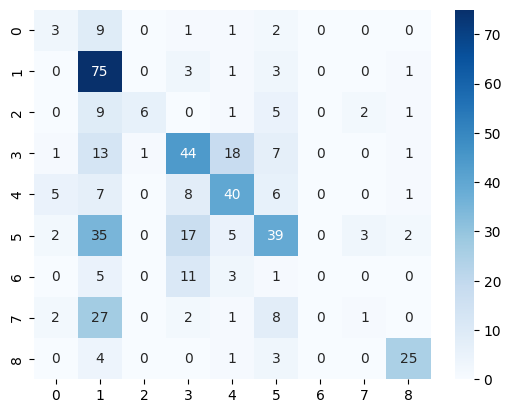

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted probabilities for the test set
y_pred_prob = model1.predict(x_test)

# Find the class with the highest probability for each sample
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='macro')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')
kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Kappa score: {kappa:.4f}")

Accuracy: 0.4936
Precision: 0.4523
Recall: 0.4018
F1-score: 0.3905
Kappa score: 0.3941


C:\Users\DEVADHARSHINI K\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
model_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
model2 = Sequential()
for layer in model_VGG16.layers:
    layer.trainable = False
model2.add(model_VGG16)
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               1573376   
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)               

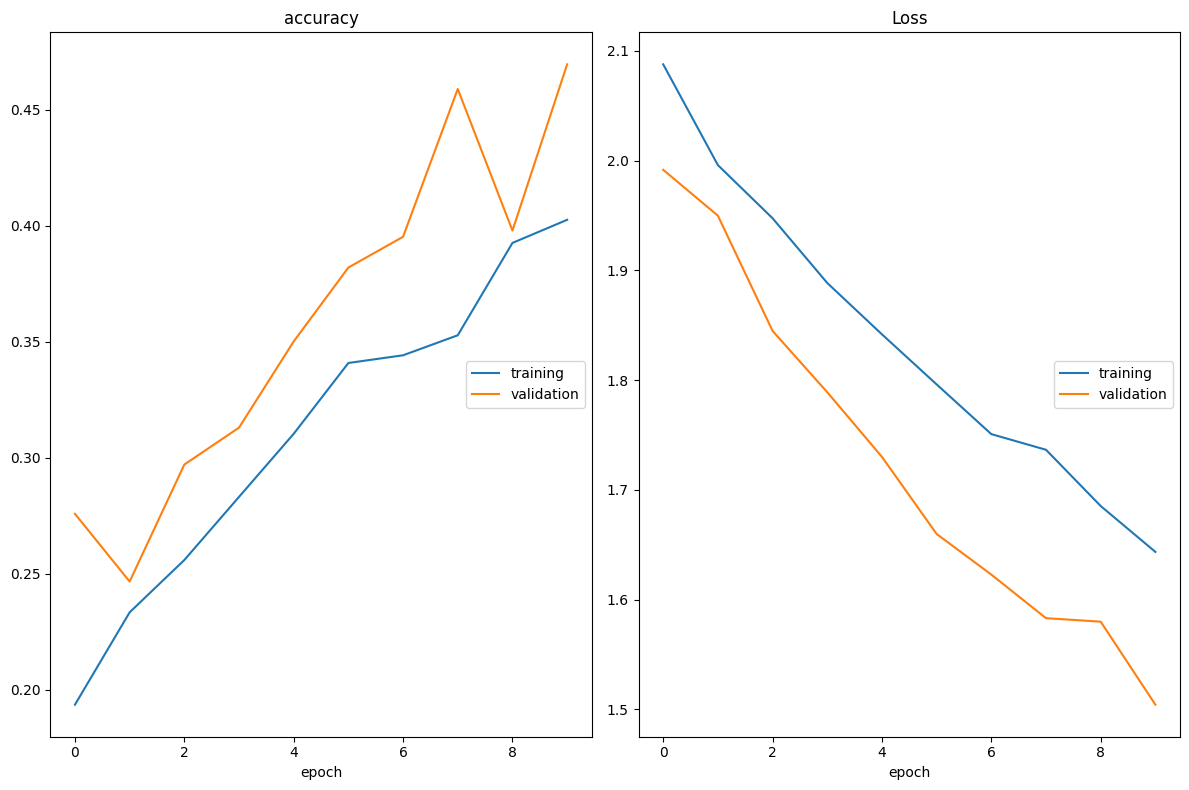

accuracy
	training         	 (min:    0.194, max:    0.403, cur:    0.403)
	validation       	 (min:    0.247, max:    0.469, cur:    0.469)
Loss
	training         	 (min:    1.643, max:    2.088, cur:    1.643)
	validation       	 (min:    1.504, max:    1.992, cur:    1.504)
48/48 [==============================] - 58s 1s/step - loss: 1.6435 - accuracy: 0.4025 - val_loss: 1.5042 - val_accuracy: 0.4695


In [31]:
from tensorflow.keras.optimizers import SGD
# Compile the model
opt = SGD(learning_rate=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
# Fit the model
history = model2.fit(x=x_train,
                    y=y_train,
                    validation_split=0.2,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_validate, y_validate),
                    callbacks=[PlotLossesKeras()])

In [32]:
loss, accuracy = model2.evaluate(x_train, y_train, verbose=1)
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

48/48 [==============================] - 45s 930ms/step - loss: 1.5305 - accuracy: 0.4516
Train: accuracy = 0.451592  ;  loss = 1.530529


In [33]:
loss, accuracy = model2.evaluate(x_test, y_test, verbose=1)
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

15/15 [==============================] - 15s 931ms/step - loss: 1.5928 - accuracy: 0.4576
Train: accuracy = 0.457627  ;  loss = 1.592848


15/15 [==============================] - 14s 914ms/step


<Axes: >

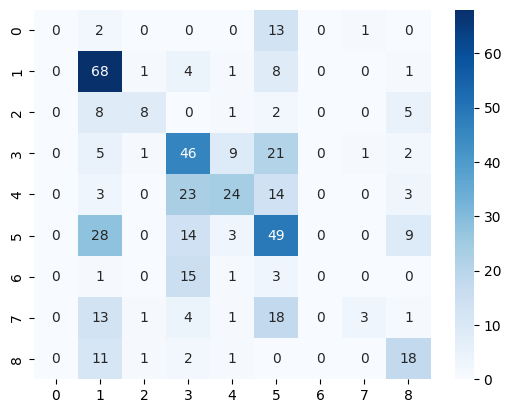

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted probabilities for the test set
y_pred_prob = model2.predict(x_test)

# Find the class with the highest probability for each sample
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='macro')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')
kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Kappa score: {kappa:.4f}")

Accuracy: 0.4576
Precision: 0.4013
Recall: 0.3496
F1-score: 0.3370
Kappa score: 0.3446


C:\Users\DEVADHARSHINI K\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
def predict_single(model, x_random, y_random, label_map):
    predictions = model.predict(x_random)
    for i in range(len(x_random)):
        print(f"Actual: {label_map[np.argmax(y_random[i])]}")
        print(f"Predicted: {label_map[np.argmax(predictions[i])]}")
        print()
import random

random_indices = random.sample(range(len(x_test)), 6)
x_random = x_test[random_indices]
y_random = y_test[random_indices]

print("DenseNet201")
predict_single(model1, x_random, y_random, label_map)

DenseNet201
1/1 [==============================] - 0s 371ms/step
Actual: basal cell carcinoma
Predicted: basal cell carcinoma

Actual: melanoma
Predicted: nevus

Actual: pigmented benign keratosis
Predicted: pigmented benign keratosis

Actual: melanoma
Predicted: pigmented benign keratosis

Actual: melanoma
Predicted: vascular lesion

Actual: nevus
Predicted: nevus



In [37]:
random_indices = random.sample(range(len(x_test)), 6)
x_random = x_test[random_indices]
y_random = y_test[random_indices]

print("VGG16")
predict_single(model2, x_random, y_random, label_map)

VGG16
1/1 [==============================] - 0s 252ms/step
Actual: nevus
Predicted: nevus

Actual: basal cell carcinoma
Predicted: pigmented benign keratosis

Actual: actinic keratosis
Predicted: pigmented benign keratosis

Actual: pigmented benign keratosis
Predicted: pigmented benign keratosis

Actual: melanoma
Predicted: pigmented benign keratosis

Actual: dermatofibroma
Predicted: basal cell carcinoma



In [38]:
# Assuming you have trained Model A and Model B already
predictions_model_a = model1.predict(x_test)
predictions_model_b = model2.predict(x_test)

# Average predictions
ensemble_predictions = (predictions_model_a + predictions_model_b) / 2

# For classification tasks, get the class with maximum probability
# Replace this with appropriate code if you have a regression task
ensemble_classes = np.argmax(ensemble_predictions, axis=1)

# Calculate accuracy
true_labels = np.argmax(y_test, axis=1)
ensemble_accuracy = np.mean(ensemble_classes == true_labels)
print("Ensemble Accuracy:", ensemble_accuracy)

15/15 [==============================] - 14s 921ms/step
Ensemble Accuracy: 0.5084745762711864


In [39]:
from keras.models import load_model

# # Load the model
# # Assuming you have trained a model and stored it in a variable named 'model'
# model.save(r'C:\Users\DEVADHARSHINI K\OneDrive\Desktop\my_model.h5')
# Save the VGG model


model2.save('vgg.h5')
model1.save("densenet.h5")

In [47]:
from keras.models import load_model
import numpy as np
import cv2
# Load the pre-trained models
model1 = load_model(r'C:\Users\DEVADHARSHINI K\densenet.h5')
model2 = load_model(r'C:\Users\DEVADHARSHINI K\vgg.h5')

# Assuming you have your x_test data loaded

# Get predictions from both models
predictions_model1 = model1.predict(x_test)
predictions_model2 = model2.predict(x_test)

# Average predictions
ensemble_predictions = (predictions_model1 + predictions_model2) / 2

15/15 [==============================] - 25s 2s/step


In [ ]:
import cv2

def estimate_size(image):
    # Estimate size (assuming size is proportional to area)
    height, width, _ = image.shape
    size = height * width
    return size

def estimate_depth(image):
    # Estimate depth (assuming depth is proportional to color intensity variation)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    depth = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return depth

# Example usage
image_path = r"C:\Users\DEVADHARSHINI K\OneDrive\Desktop\STUDY\PROJECTS\Project sem VI\cogn\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_0010889.jpg"
image = cv2.imread(image_path)

size_estimate = estimate_size(image)
depth_estimate = estimate_depth(image)

print("Estimated Size:", size_estimate)
print("Estimated Depth:", depth_estimate)
# Define thresholds and corresponding risk levels
SIZE_THRESHOLD = 50000  # Adjust as needed
DEPTH_THRESHOLD = 50    # Adjust as needed

def estimate_risk(size, depth):
    # Categorize risk based on thresholds
    if 1000 < size > 5000 and 20 < depth > DEPTH_THRESHOLD:
        return "High Risk"
    elif size > SIZE_THRESHOLD or depth > DEPTH_THRESHOLD:
        return "Medium Risk"
    else:
        return "Low Risk"

# Function to estimate size and depth, and calculate risk factor
def estimate_risk_factor(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Estimate size and depth
    size_estimate = estimate_size(image)
    depth_estimate = estimate_depth(image)
    
    # Calculate risk factor
    risk_factor = estimate_risk(size_estimate, depth_estimate)
    
    return risk_factor

# Example usage
image_path = r"C:\Users\DEVADHARSHINI K\OneDrive\Desktop\STUDY\PROJECTS\Project sem VI\cogn\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_0010889.jpg"
risk_factor = estimate_risk_factor(image_path)
print("Risk Factor:", risk_factor)


In [ ]:
np.save('ensemble.npy', ensemble_predictions)